In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime, time, requests
from time import sleep

In [5]:
!conda install -c conda-forge basemap --yes 

Solving environment: done

# All requested packages already installed.



In [6]:
from mpl_toolkits.basemap import Basemap

Novel Corona Virus 2019 Dataset:

In [7]:
covid_19_data = pd.read_csv('covid_19_data.csv')
covid_19_data['ObservationDate'] = pd.to_datetime(covid_19_data['ObservationDate'])
covid_19_data = covid_19_data.sort_values('ObservationDate', ascending=True)
print('Shape:', covid_19_data.shape)
print('Date min:', np.min(covid_19_data['ObservationDate']), 'Date max:', np.max(covid_19_data['ObservationDate']))
# replace NaN Provinces with string
covid_19_data['Province/State'] = covid_19_data['Province/State'].fillna('No_Province')
covid_19_data.tail()

Shape: (13209, 8)
Date min: 2020-01-22 00:00:00 Date max: 2020-04-08 00:00:00


SNo ObservationDate Province/State  Country/Region  \
12991  12992      2020-04-08    No_Province        Maldives   
12990  12991      2020-04-08    No_Province        Malaysia   
12989  12990      2020-04-08    No_Province          Malawi   
13047  13048      2020-04-08    No_Province     Switzerland   
13208  13209      2020-04-08       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
12991  2020-04-08 22:59:00       19.0     0.0       13.0  
12990  2020-04-08 22:59:00     4119.0    65.0     1487.0  
12989  2020-04-08 22:59:00        8.0     1.0        0.0  
13047  2020-04-08 22:59:00    23280.0   895.0     9800.0  
13208  2020-04-08 22:59:00     1266.0     1.0     1232.0

Brief data prep and exploration

In [8]:
# how many NaNs?
count_nan = len(covid_19_data) - covid_19_data.count()
count_nan

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [9]:
# how many countries do we have?
countries =list(set(covid_19_data['Country/Region']))
print('Unique Country/Regio found:', str(len(countries)))
countries

Unique Country/Regio found: 219


['Argentina',
 'Martinique',
 'Bolivia',
 'Mozambique',
 'Belize',
 'Liechtenstein',
 'Madagascar',
 'Laos',
 'Saudi Arabia',
 'Antigua and Barbuda',
 'Malaysia',
 'Belarus',
 'North Macedonia',
 'Pakistan',
 'Djibouti',
 'Western Sahara',
 'Guinea',
 'Nicaragua',
 'Greenland',
 'Aruba',
 'Kenya',
 'Kyrgyzstan',
 'Diamond Princess',
 'Burundi',
 'US',
 'Sri Lanka',
 'Equatorial Guinea',
 'Ghana',
 'Serbia',
 'South Sudan',
 'Faroe Islands',
 'Sudan',
 'Holy See',
 'Hong Kong',
 'Thailand',
 'Andorra',
 'Norway',
 'Cape Verde',
 'Slovenia',
 'Liberia',
 'Colombia',
 'Macau',
 'Armenia',
 'Morocco',
 'Chile',
 'Paraguay',
 'Poland',
 'Guam',
 'East Timor',
 'Syria',
 'Monaco',
 'Guernsey',
 'Senegal',
 'Kuwait',
 'Bhutan',
 'Guatemala',
 'Timor-Leste',
 'Congo (Brazzaville)',
 'Iran',
 'Guinea-Bissau',
 'Mayotte',
 'Iceland',
 'French Guiana',
 'Fiji',
 'San Marino',
 'Sweden',
 'Ecuador',
 'Mainland China',
 'Iraq',
 'North Ireland',
 'Niger',
 'St. Martin',
 'Turkey',
 'Kazakhstan',
 '

In [10]:
# how many province/states do we have?
zones =list((set(covid_19_data['Province/State'])))
print('Unique Province/State found:', str(len(zones)))

Unique Province/State found: 298


In [15]:
def get_lat_lon(zone, 
                output_as = 'center'):
    # thanks openstreetmap! 
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?q=',
                             zone,
                             '&format=json&polygon=0')
    # send out request
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lon','lat']]
        output = [float(i) for i in lst]
        
    return output

In [16]:
geo_centers_lon = []
geo_centers_lat = []
total_ctry = len(countries)
counter_ = 0
for ctry in countries:
    if counter_ % 10 == 0: print(total_ctry - counter_)
    time.sleep(0.2)
    centroid = [None, None]
    try:
        centroid = get_lat_lon(ctry, output_as='center')

    except:
        print('Could not find:', ctry)
        
    geo_centers_lon.append(centroid[0])
    geo_centers_lat.append(centroid[1])
        
     
    counter_ += 1

219
209
199
189
179
169
159
149
139
129
119
109
99
89
79
69
59
49
Could not find: occupied Palestinian territory
39
29
19
9


In [17]:
# Add geos back to data frame
full_lats = []
full_lons = []
for i, r in covid_19_data.iterrows():
    country = r['Country/Region']
    index_list = countries.index(country)
    full_lats.append(geo_centers_lat[index_list])
    full_lons.append(geo_centers_lon[index_list])
     
# add to data frame
covid_19_data['Longitude'] = full_lons
covid_19_data['Latitude'] = full_lats
covid_19_data.head(10)

SNo ObservationDate Province/State  Country/Region      Last Update  \
0     1      2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
21   22      2020-01-22        Ningxia  Mainland China  1/22/2020 17:00   
22   23      2020-01-22        Qinghai  Mainland China  1/22/2020 17:00   
23   24      2020-01-22        Shaanxi  Mainland China  1/22/2020 17:00   
24   25      2020-01-22       Shandong  Mainland China  1/22/2020 17:00   
25   26      2020-01-22       Shanghai  Mainland China  1/22/2020 17:00   
26   27      2020-01-22         Shanxi  Mainland China  1/22/2020 17:00   
27   28      2020-01-22        Sichuan  Mainland China  1/22/2020 17:00   
20   21      2020-01-22          Macau           Macau  1/22/2020 17:00   
28   29      2020-01-22         Taiwan          Taiwan  1/22/2020 17:00   

    Confirmed  Deaths  Recovered   Longitude   Latitude  
0         1.0     0.0        0.0   72.833570  19.140625  
21        1.0     0.0        0.0   72.833570  19.140625  
22        0.0     0.0        0.0   72.833570  19.140625  
23        0.0     0.0        0.0   72.833570  19.140625  
24        2.0     0.0        0.0   72.833570  19.140625  
25        9.0     0.0        0.0   72.833570  19.140625  
26        1.0     0.0        0.0   72.833570  19.140625  
27        5.0     0.0        0.0   72.833570  19.140625  
20        1.0     0.0        0.0  113.551414  22.175760  
28        1.0     0.0        0.0  120.982018  23.973937

In [18]:
covid_19_data[covid_19_data['Province/State'] == 'Shanghai']

SNo ObservationDate Province/State  Country/Region  \
25        26      2020-01-22       Shanghai  Mainland China   
63        64      2020-01-23       Shanghai  Mainland China   
91        92      2020-01-24       Shanghai  Mainland China   
132      133      2020-01-25       Shanghai  Mainland China   
179      180      2020-01-26       Shanghai  Mainland China   
...      ...             ...            ...             ...   
11902  11903      2020-04-04       Shanghai  Mainland China   
12221  12222      2020-04-05       Shanghai  Mainland China   
12541  12542      2020-04-06       Shanghai  Mainland China   
12861  12862      2020-04-07       Shanghai  Mainland China   
13181  13182      2020-04-08       Shanghai  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  Longitude   Latitude  
25         1/22/2020 17:00        9.0     0.0        0.0   72.83357  19.140625  
63           1/23/20 17:00       16.0     0.0        0.0   72.83357  19.140625  
91           1/24/20 17:00       20.0     0.0        1.0   72.83357  19.140625  
132          1/25/20 17:00       33.0     0.0        1.0   72.83357  19.140625  
179          1/26/20 16:00       40.0     1.0        1.0   72.83357  19.140625  
...                    ...        ...     ...        ...        ...        ...  
11902  2020-04-04 23:41:02      529.0     6.0      356.0   72.83357  19.140625  
12221  2020-04-05 23:13:44      531.0     6.0      383.0   72.83357  19.140625  
12541          4/6/20 9:37      536.0     6.0      389.0   72.83357  19.140625  
12861  2020-04-07 23:11:31      538.0     6.0      406.0   72.83357  19.140625  
13181  2020-04-08 22:59:00      543.0     7.0      418.0   72.83357  19.140625  

[78 rows x 10 columns]

## Plot Infection Counts by Country using Basemap

In [19]:
def plot_world_map(virus_data, date, save_to_file_name = ''):
    # Set the dimension of the figure
    #plt.figure(figsize=(16, 8))
    # Set the dimension of the figure
    my_dpi=96
    plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

    # Make the background map
    m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
    m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")
    
    total_cases = np.sum(virus_data['Confirmed'])

    # Add a point per position
    m.scatter(virus_data['Longitude'], 
              virus_data['Latitude'], 
              s = virus_data['Confirmed'] * 8, # play around with the size or use np.log if you dont like the big circles
              alpha=0.4, 
              c=virus_data['labels_enc'], 
              cmap="Set1")

    plt.title(str(date) + ' Confirmed Covid-19 Cases: ' + str(int(total_cases)) + '\n(circles not to scale)', fontsize=50)
    
    if save_to_file_name != '':
        plt.savefig(save_to_file_name)
        
    plt.show()

In [20]:
# Create color map
# prepare a color for each point depending on the continent.
covid_19_data['labels_enc'] = pd.factorize(covid_19_data['Country/Region'])[0]
covid_19_data['labels_enc']

0          0
21         0
22         0
23         0
24         0
        ... 
12991    109
12990     11
12989    215
13047     44
13208      0
Name: labels_enc, Length: 13209, dtype: int64

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


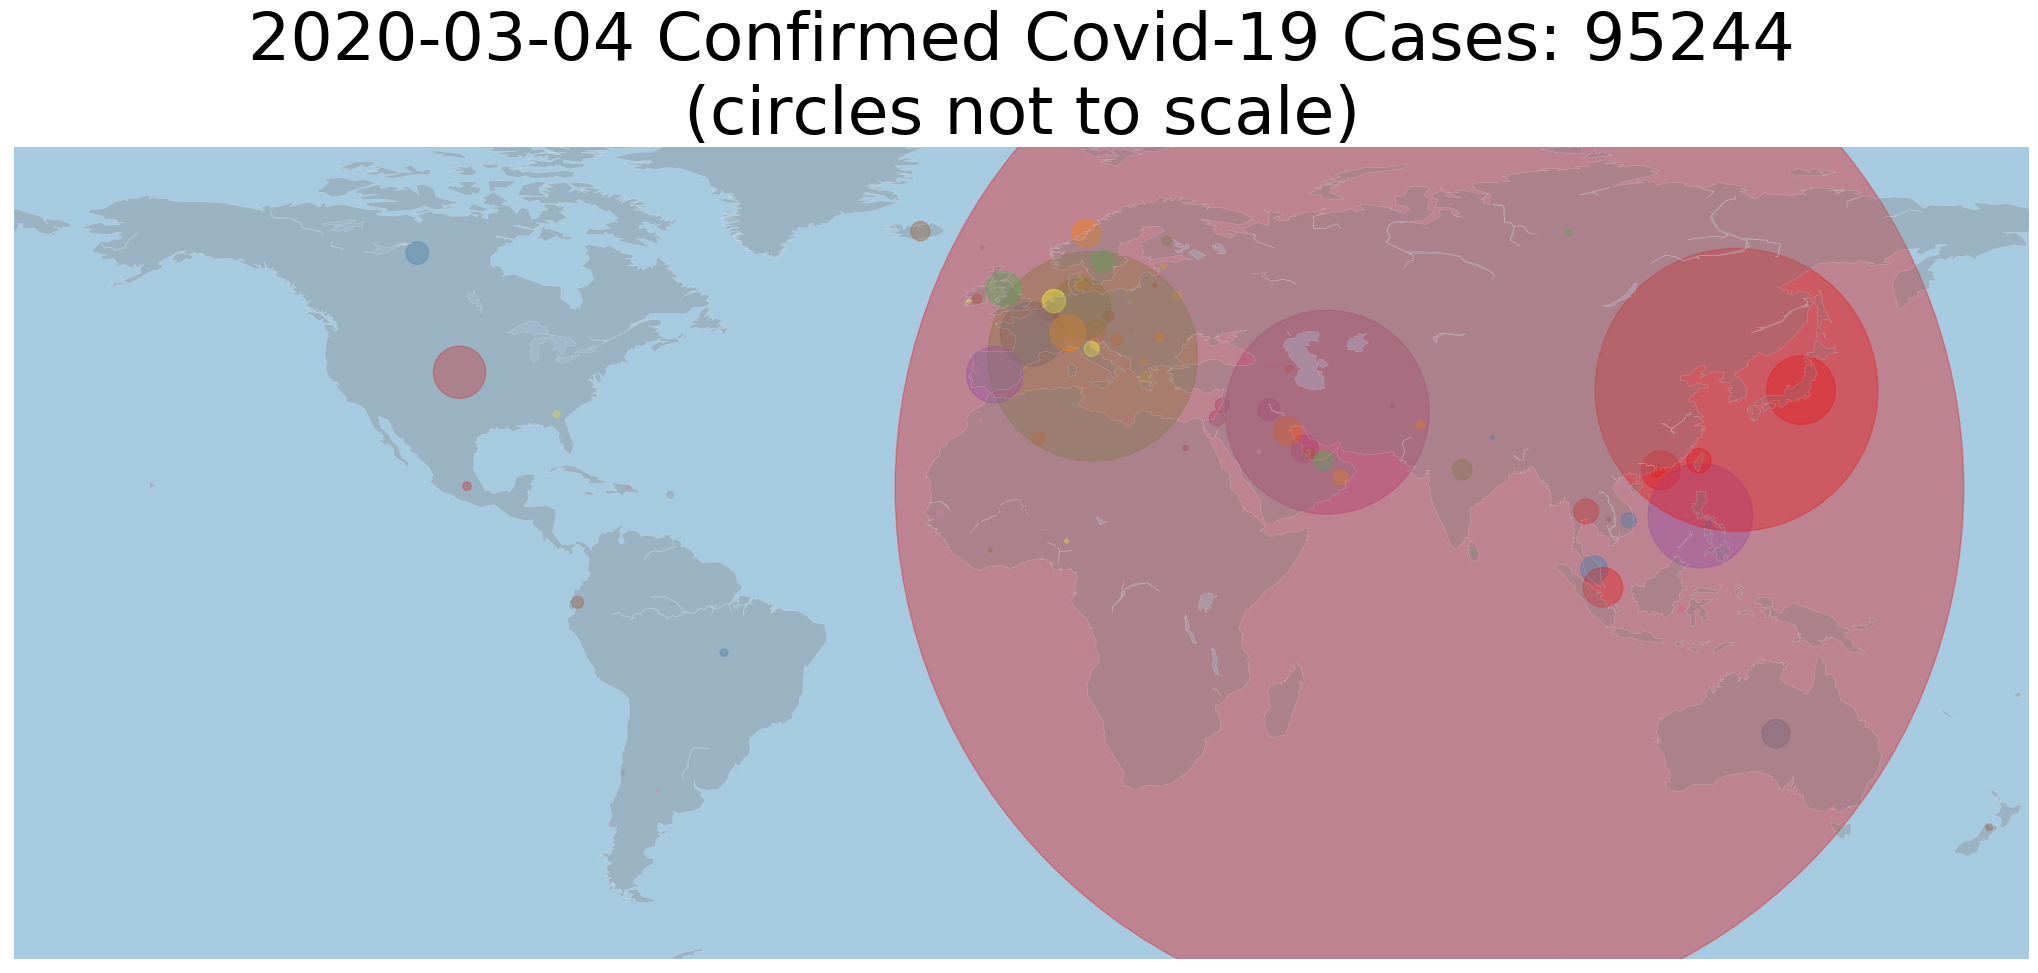

In [21]:
date = '2020-03-04' 

virus_up_to_today = covid_19_data[covid_19_data['ObservationDate'] <= date]

# simplify data set
virus_up_to_today = virus_up_to_today[['Country/Region','Province/State', 'labels_enc', 'Confirmed',
                     'Deaths', 'Recovered',
                     'Longitude', 'Latitude']]


# get totals by province then by country as these are cumulative values by province first then by country and not all countries have provinces

# group by country and sum/mean values
virus_up_to_today=virus_up_to_today.groupby(['Country/Region', 'Province/State', 'labels_enc']).agg({'Confirmed':'last', 
                           'Deaths':'last',
                           'Recovered':'last',
                           'Longitude':'mean',
                          'Latitude':'mean'}).reset_index()



# group by country and sum/mean values
virus_up_to_today=virus_up_to_today.groupby(['Country/Region', 'labels_enc']).agg({'Confirmed':'sum', 
                           'Deaths':'sum',
                           'Recovered':'sum',
                           'Longitude':'mean',
                          'Latitude':'mean'}).reset_index()

# map out confirmed cases
plot_world_map(virus_up_to_today, str(date)[0:10])

In [22]:
# build time lapse with accumulator count by country
dates = sorted(list(set(covid_19_data['ObservationDate'])))
dates

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


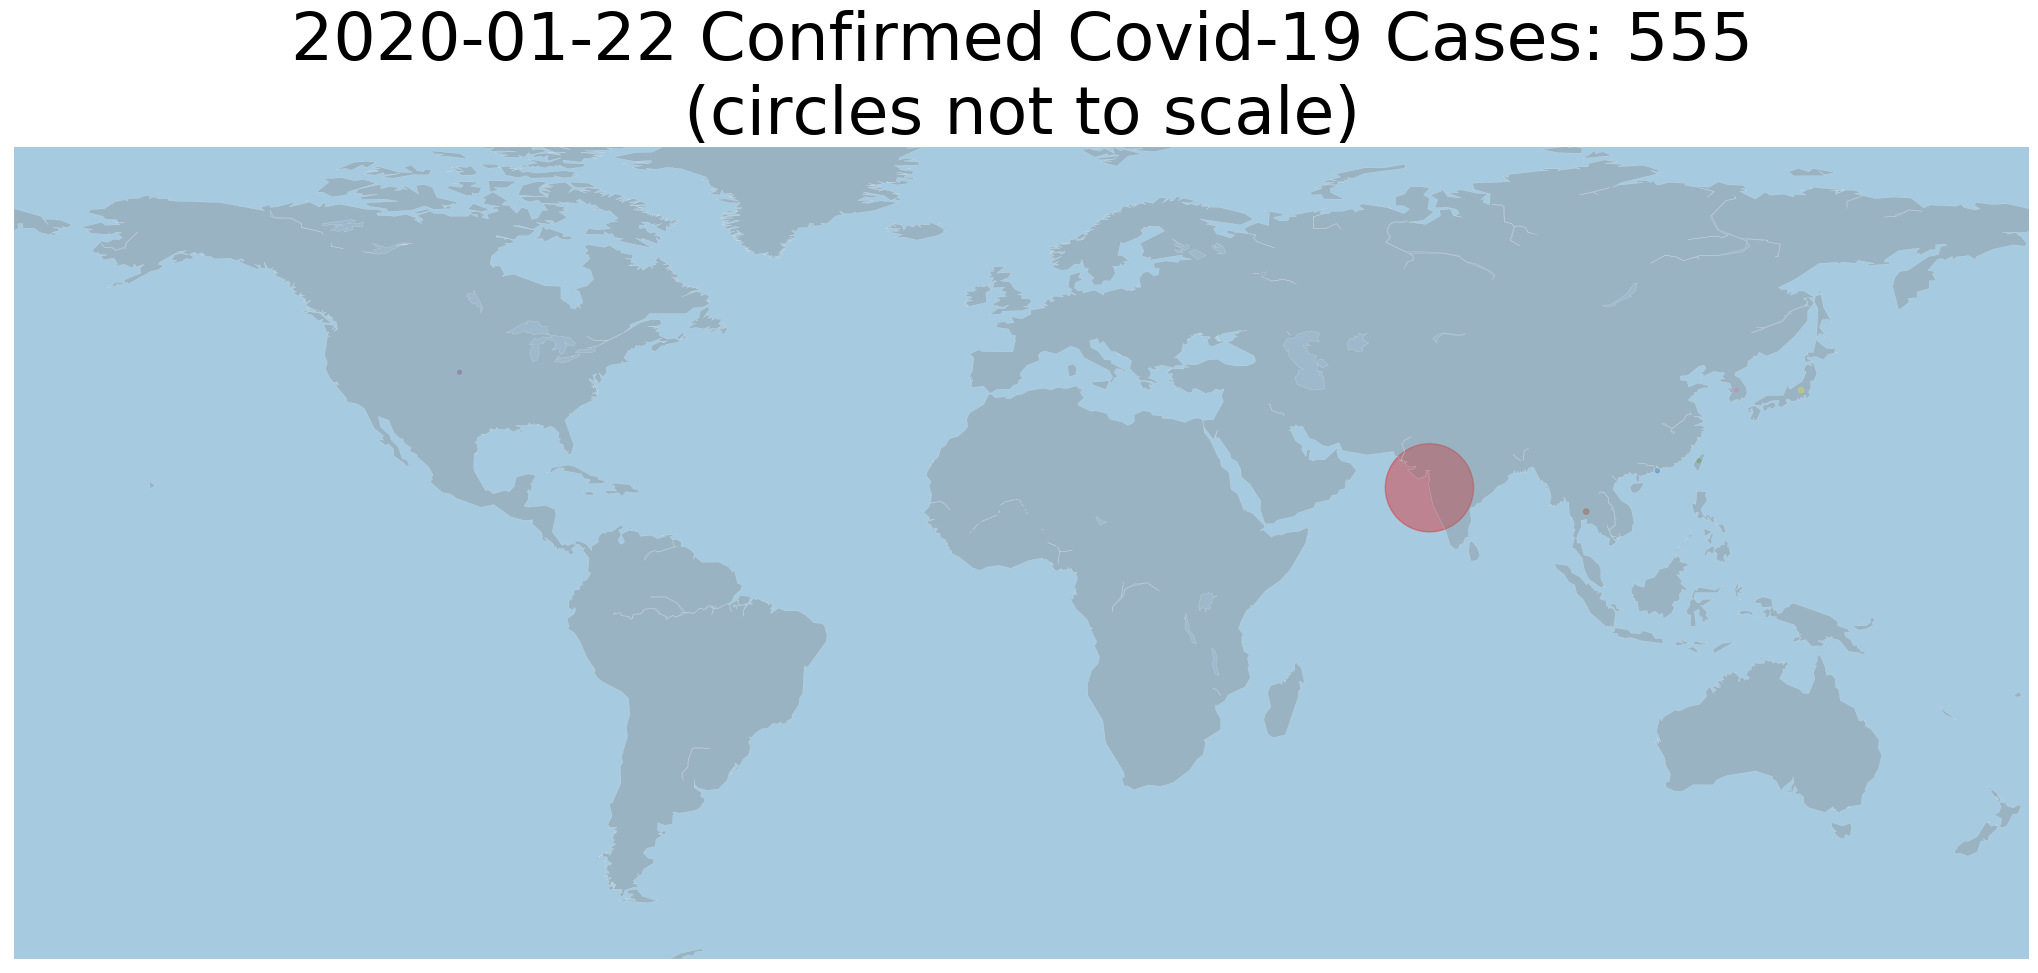

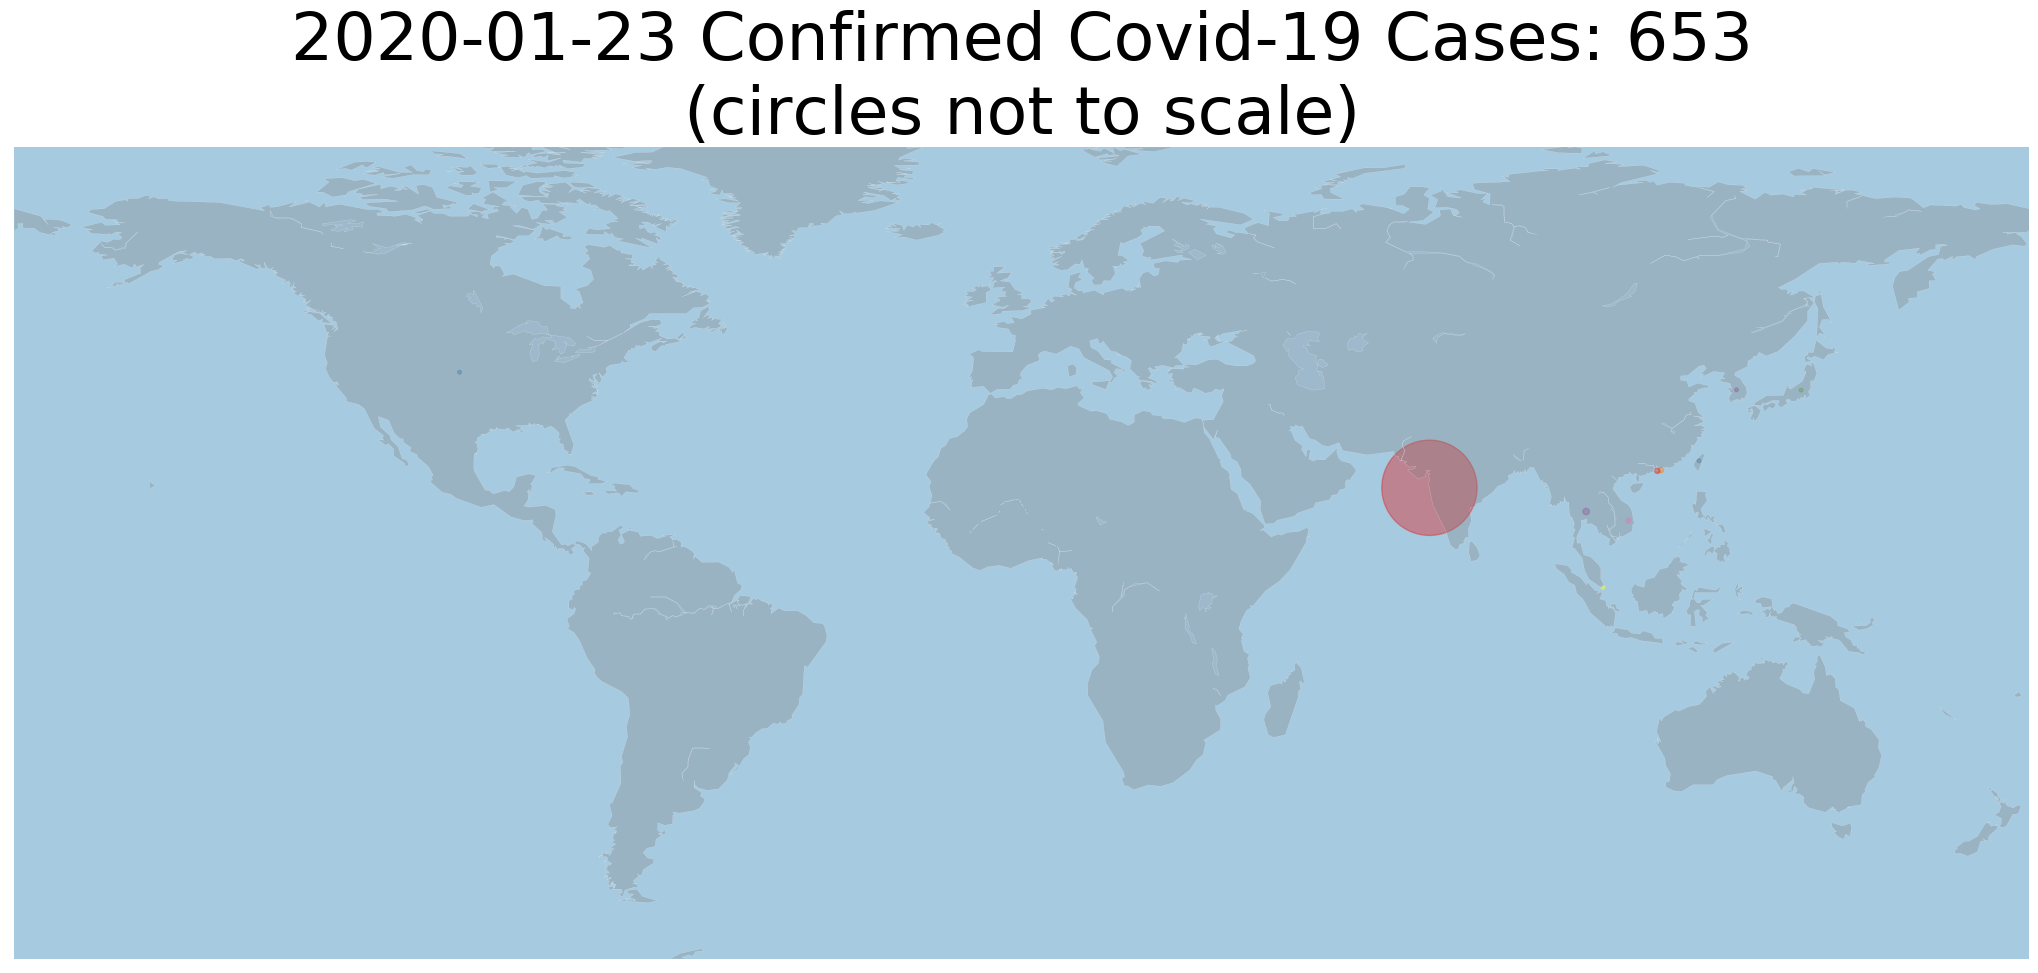

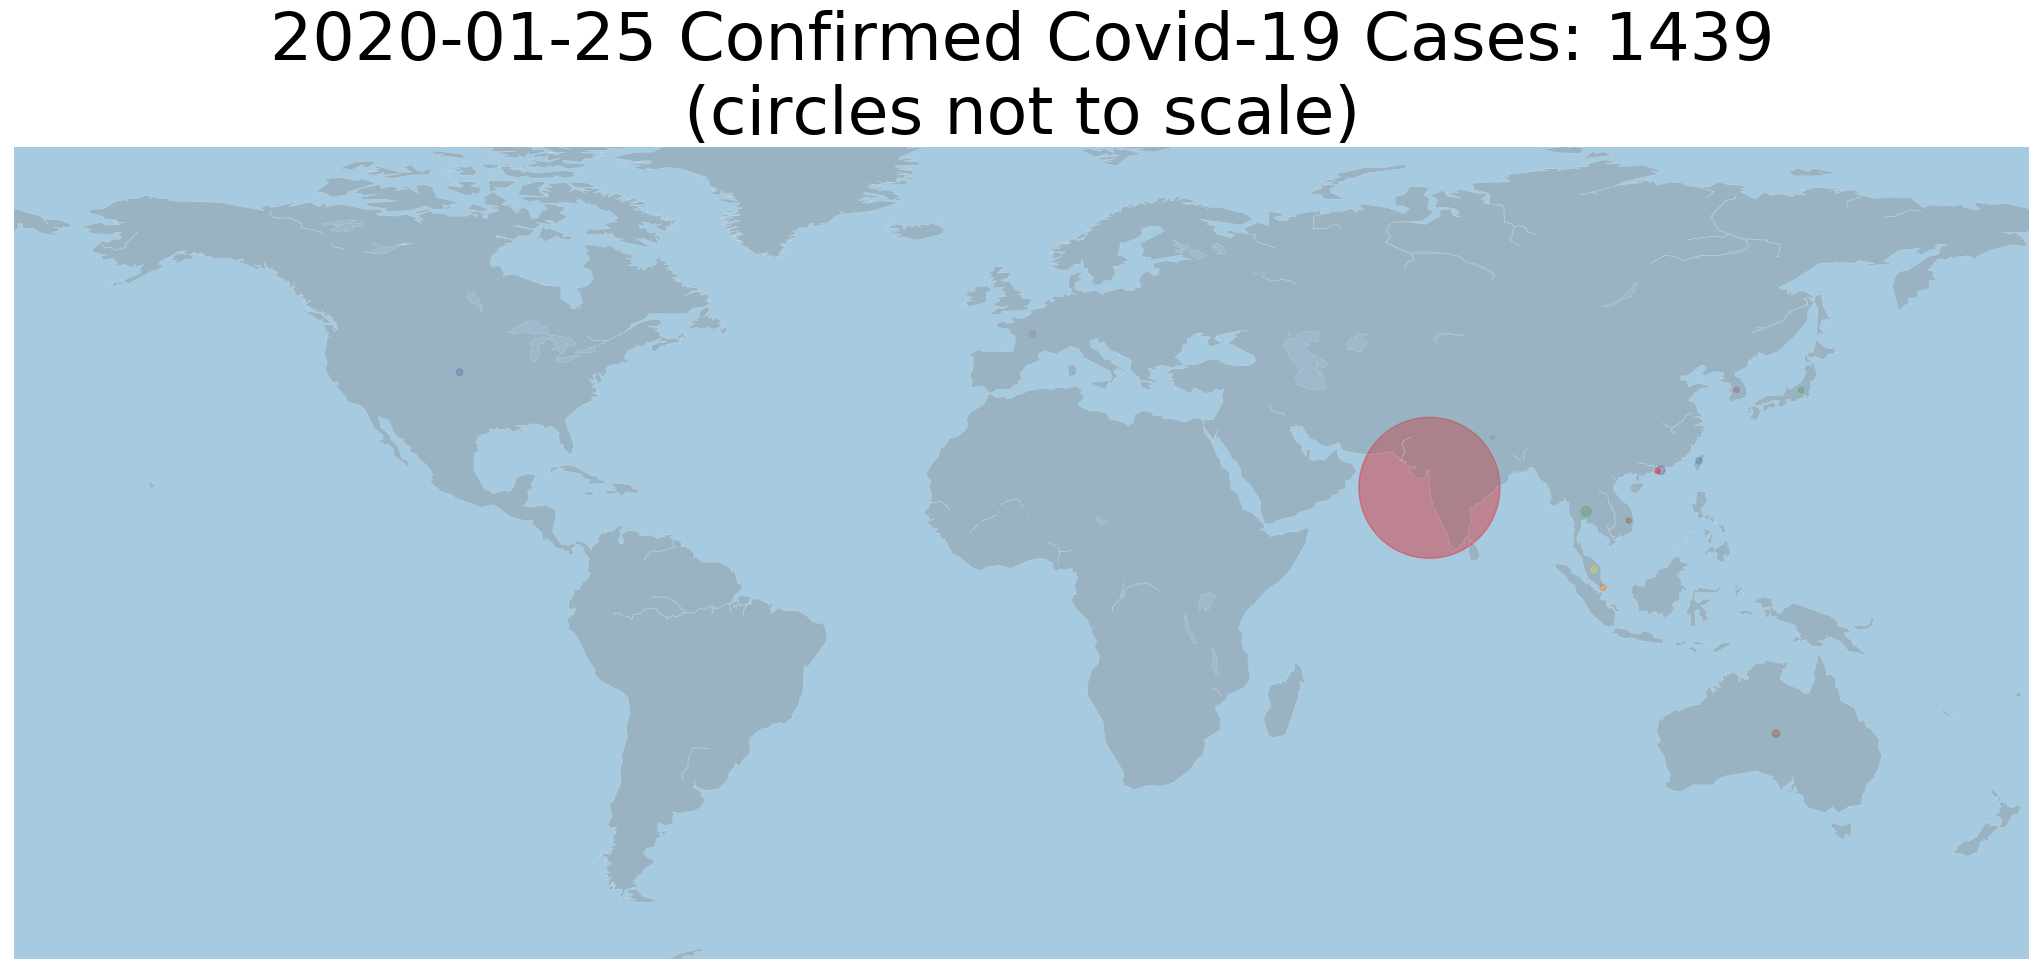

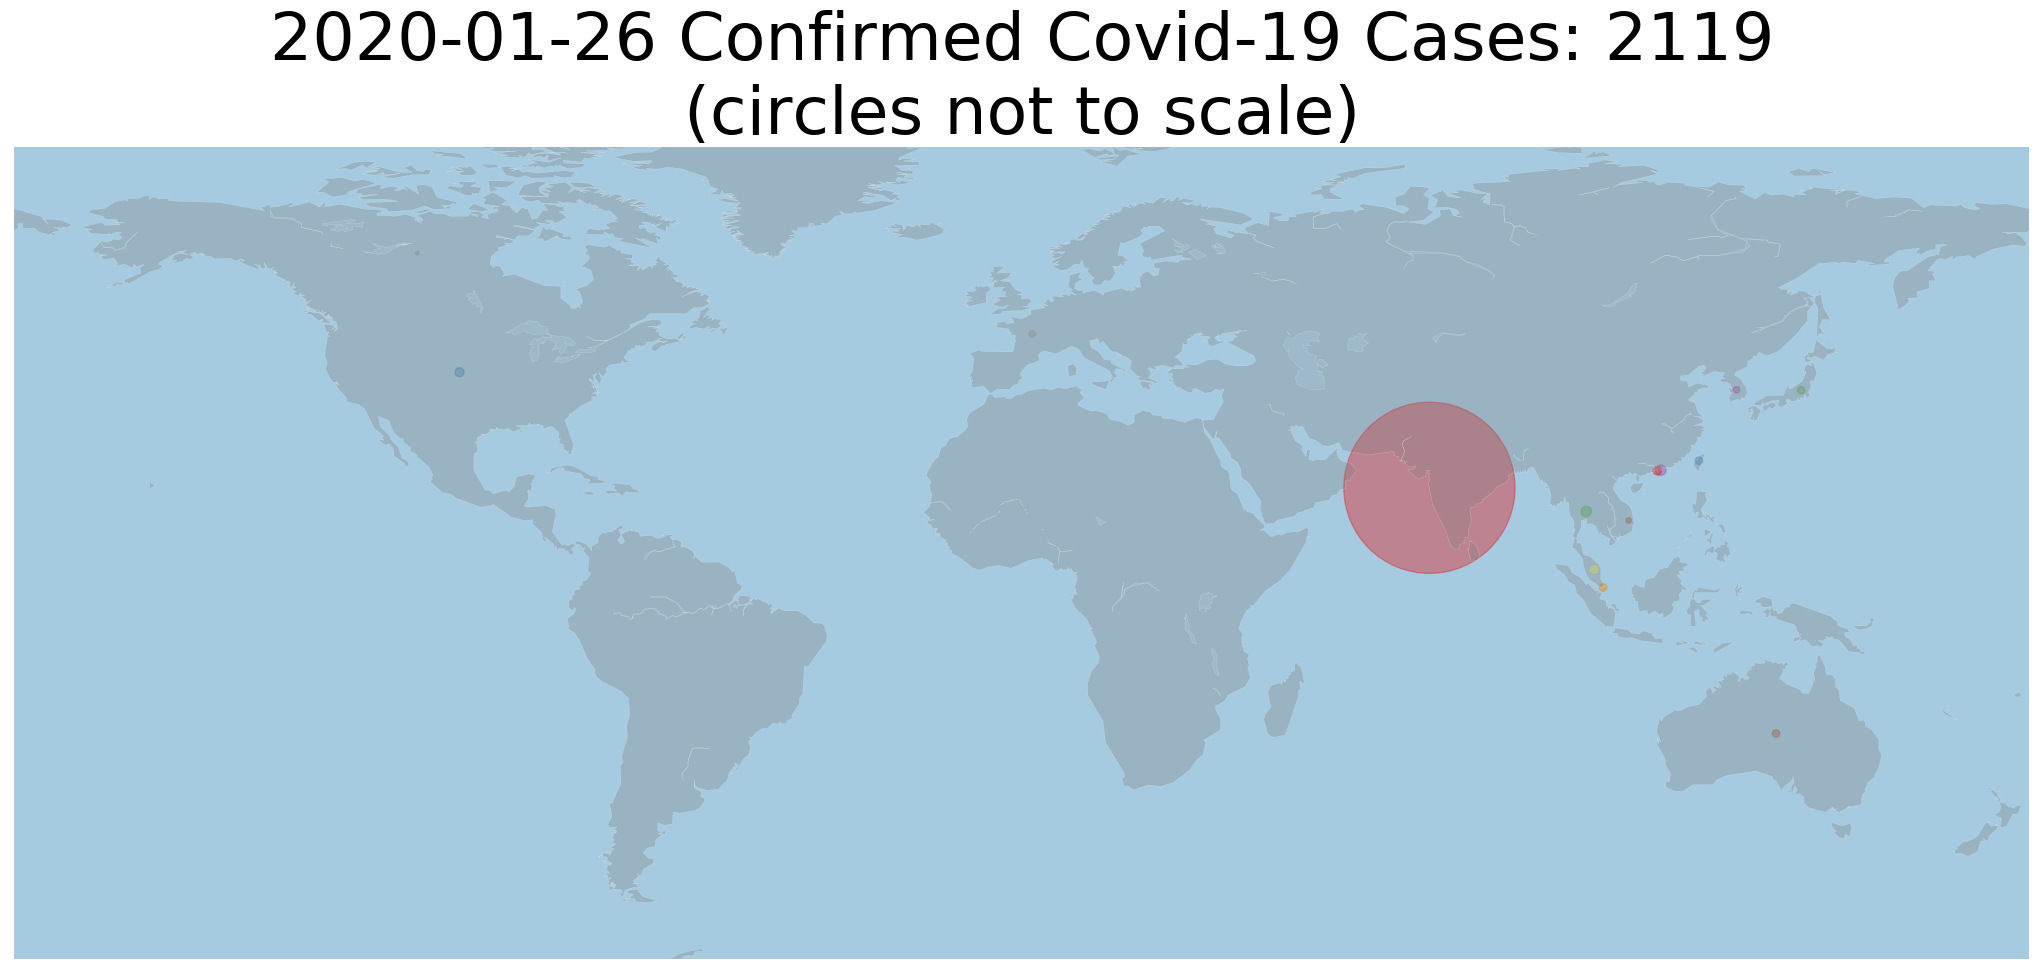

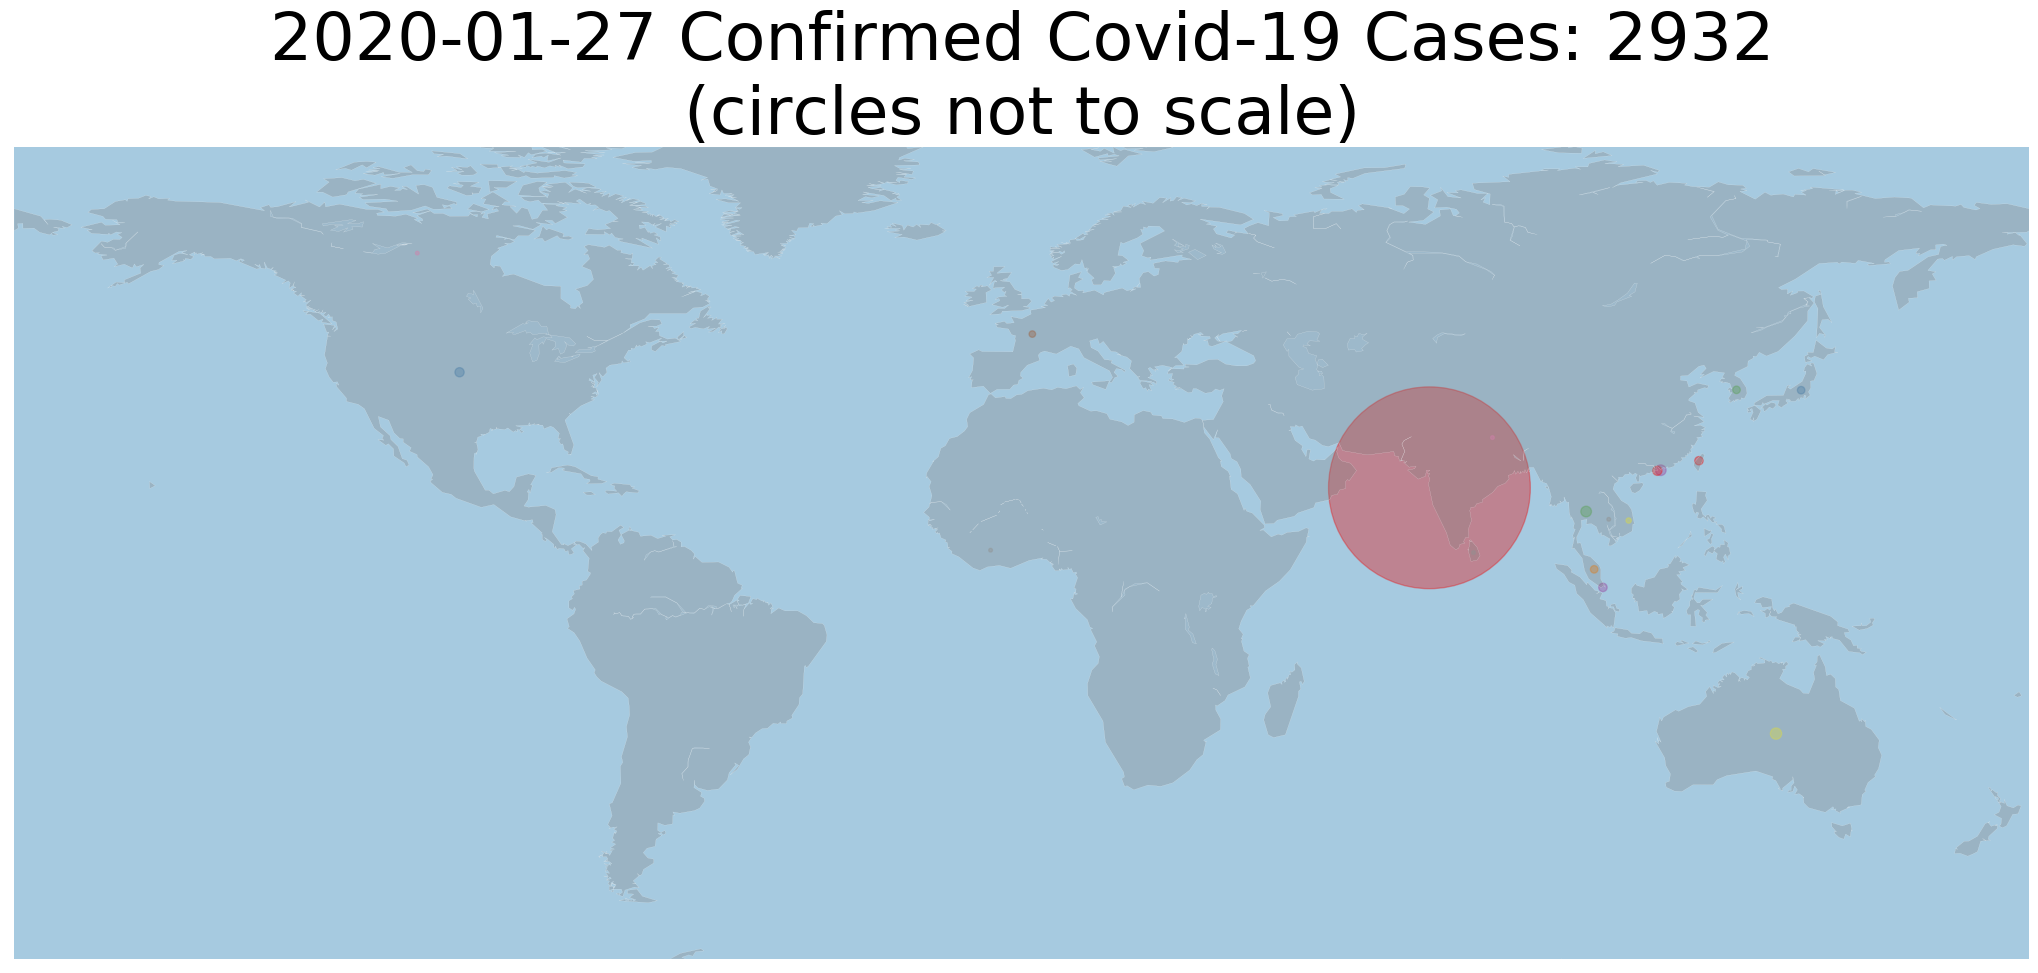

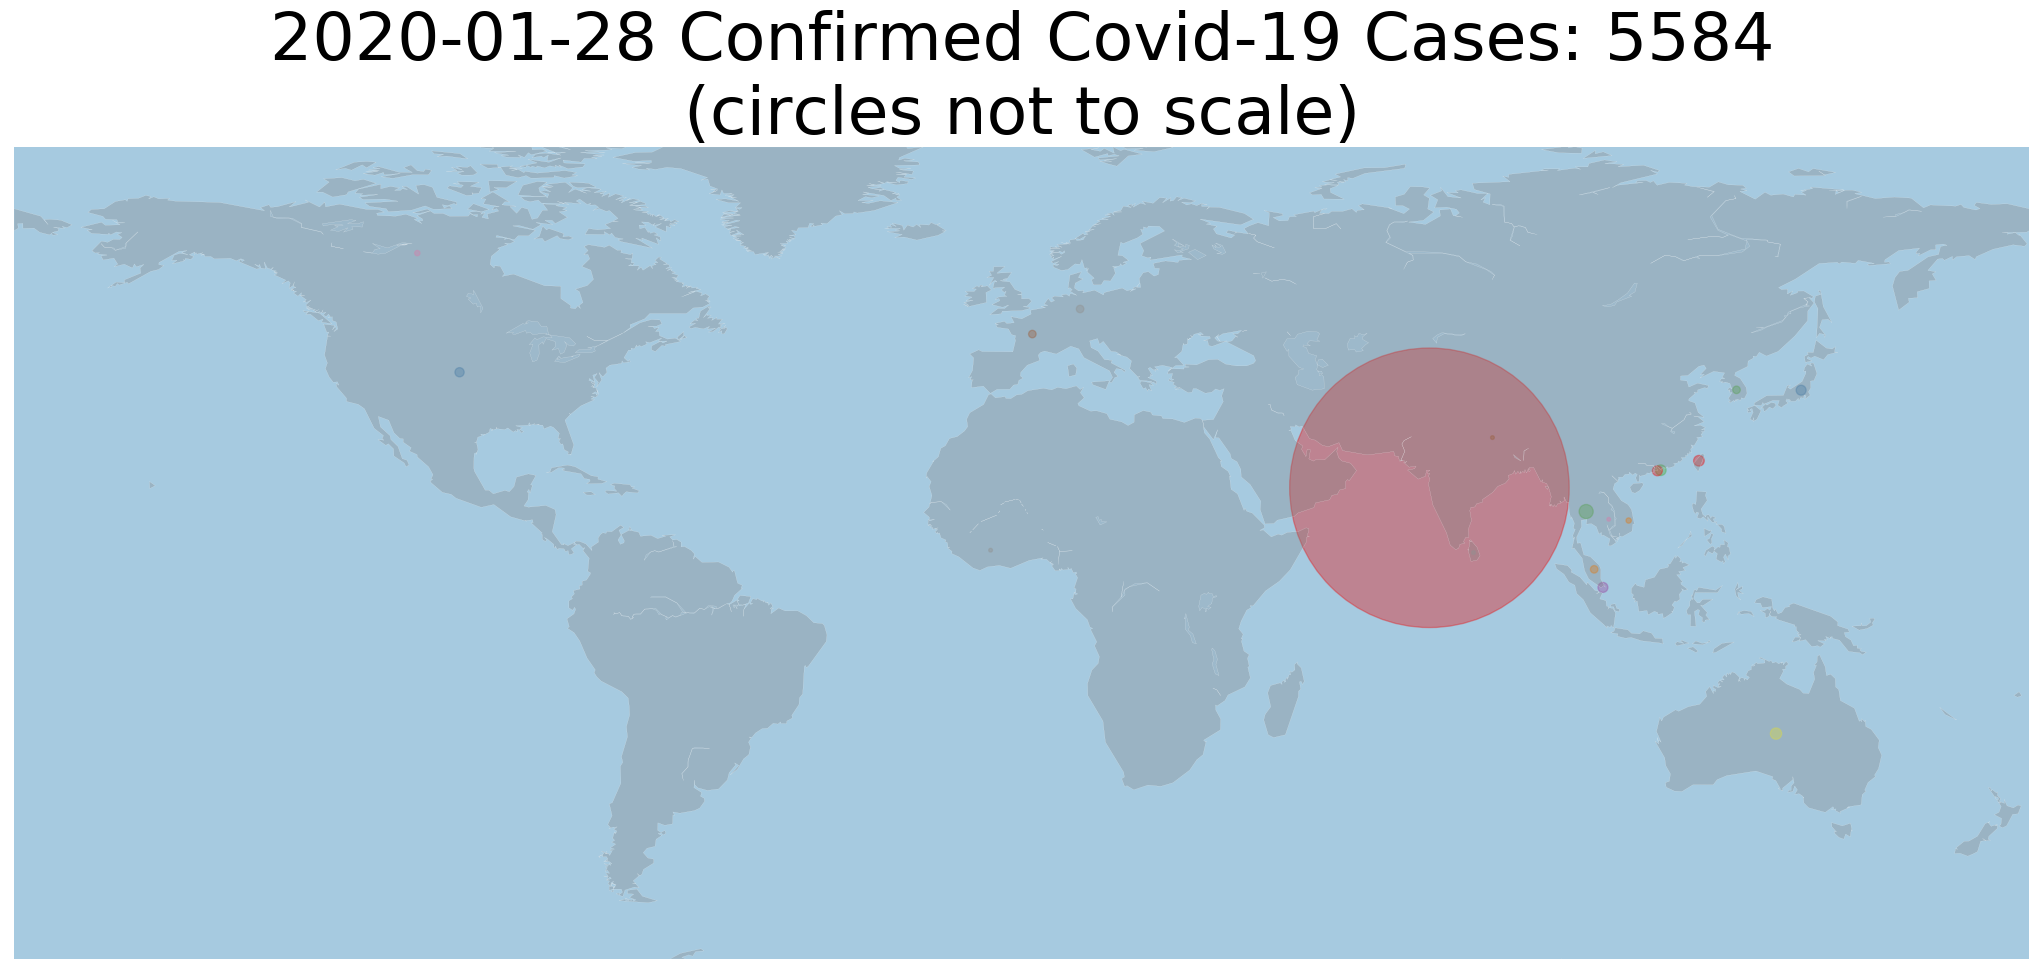

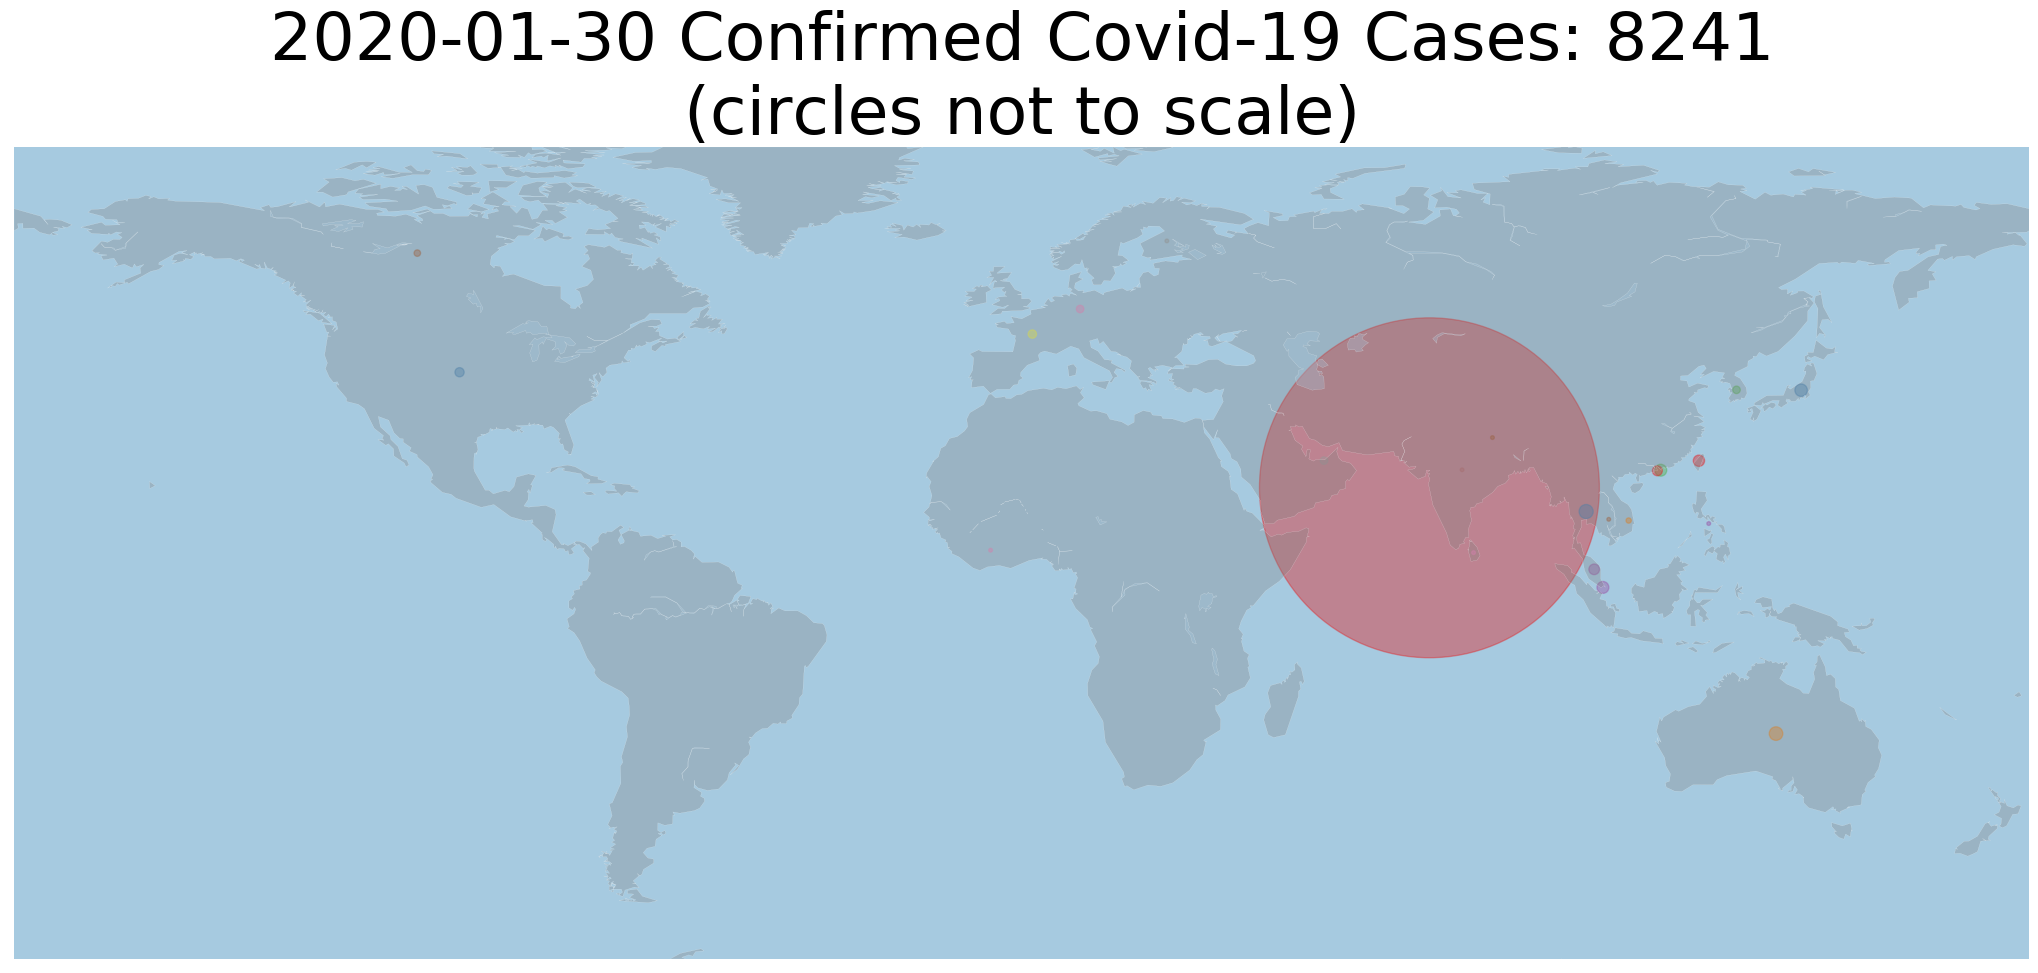

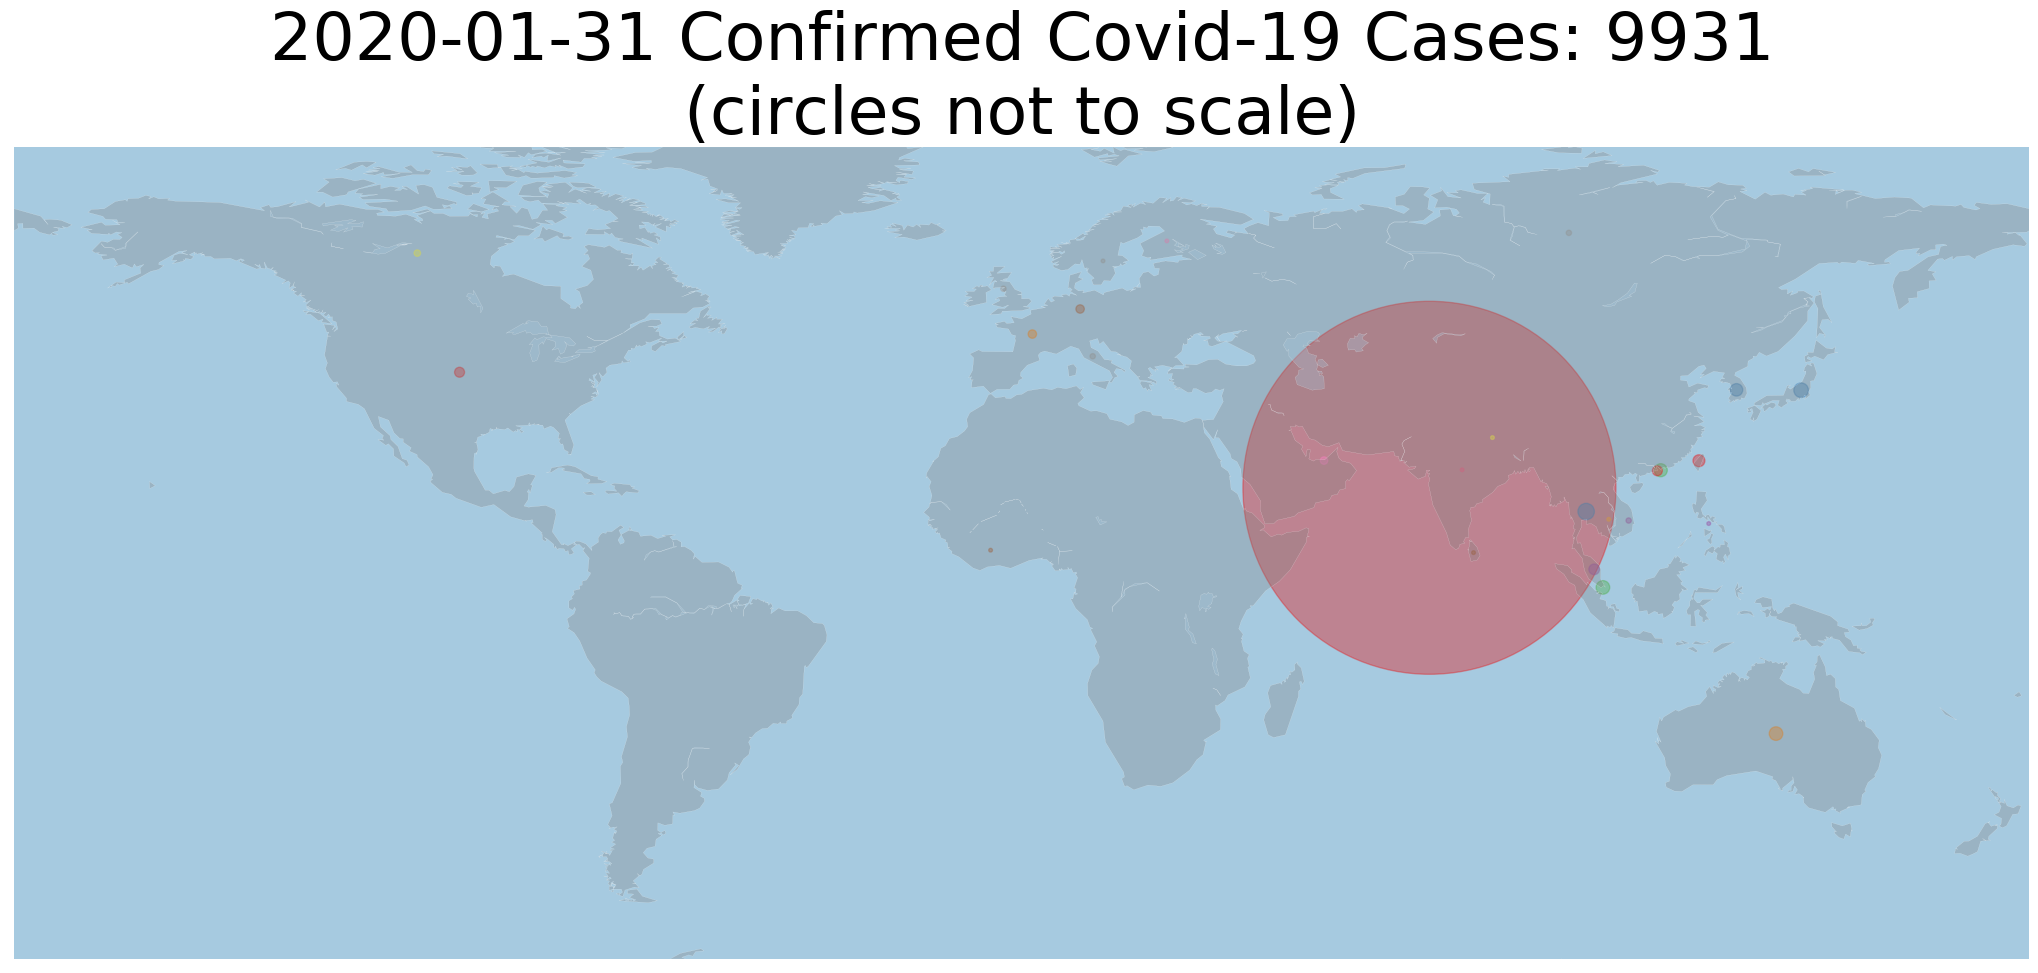

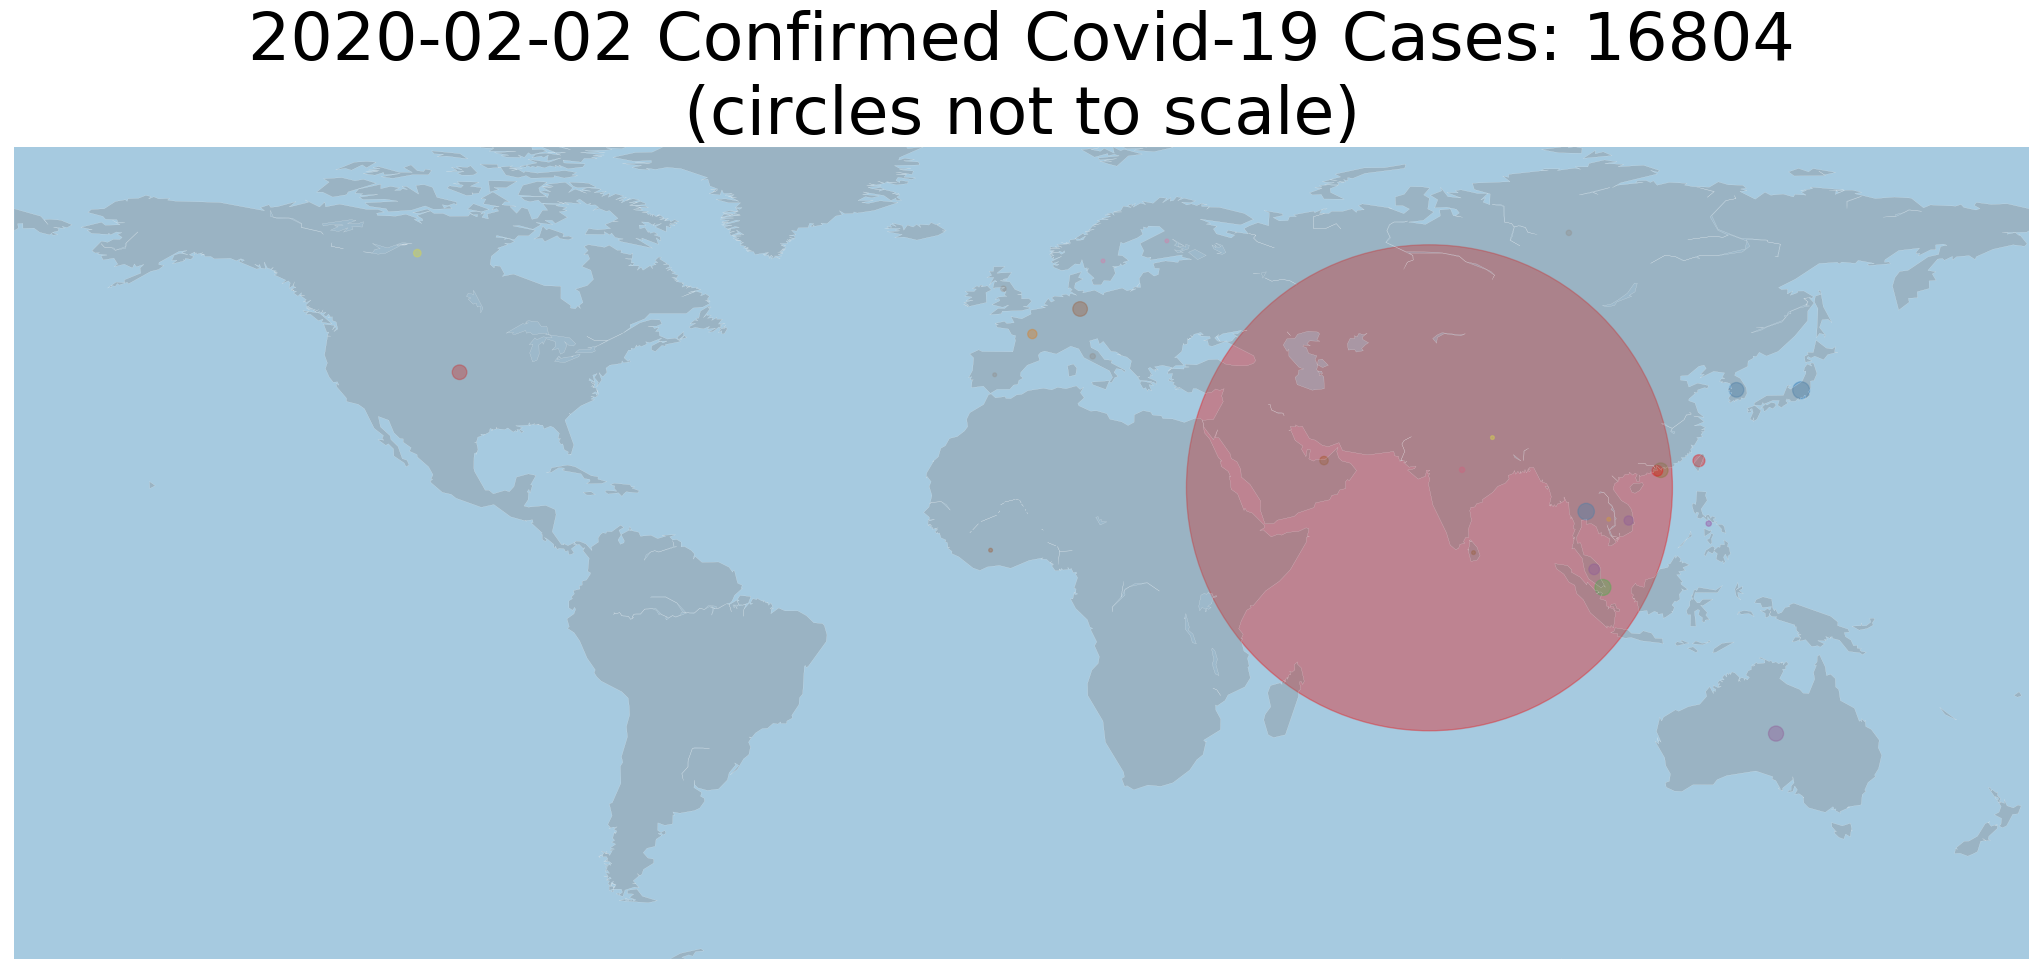

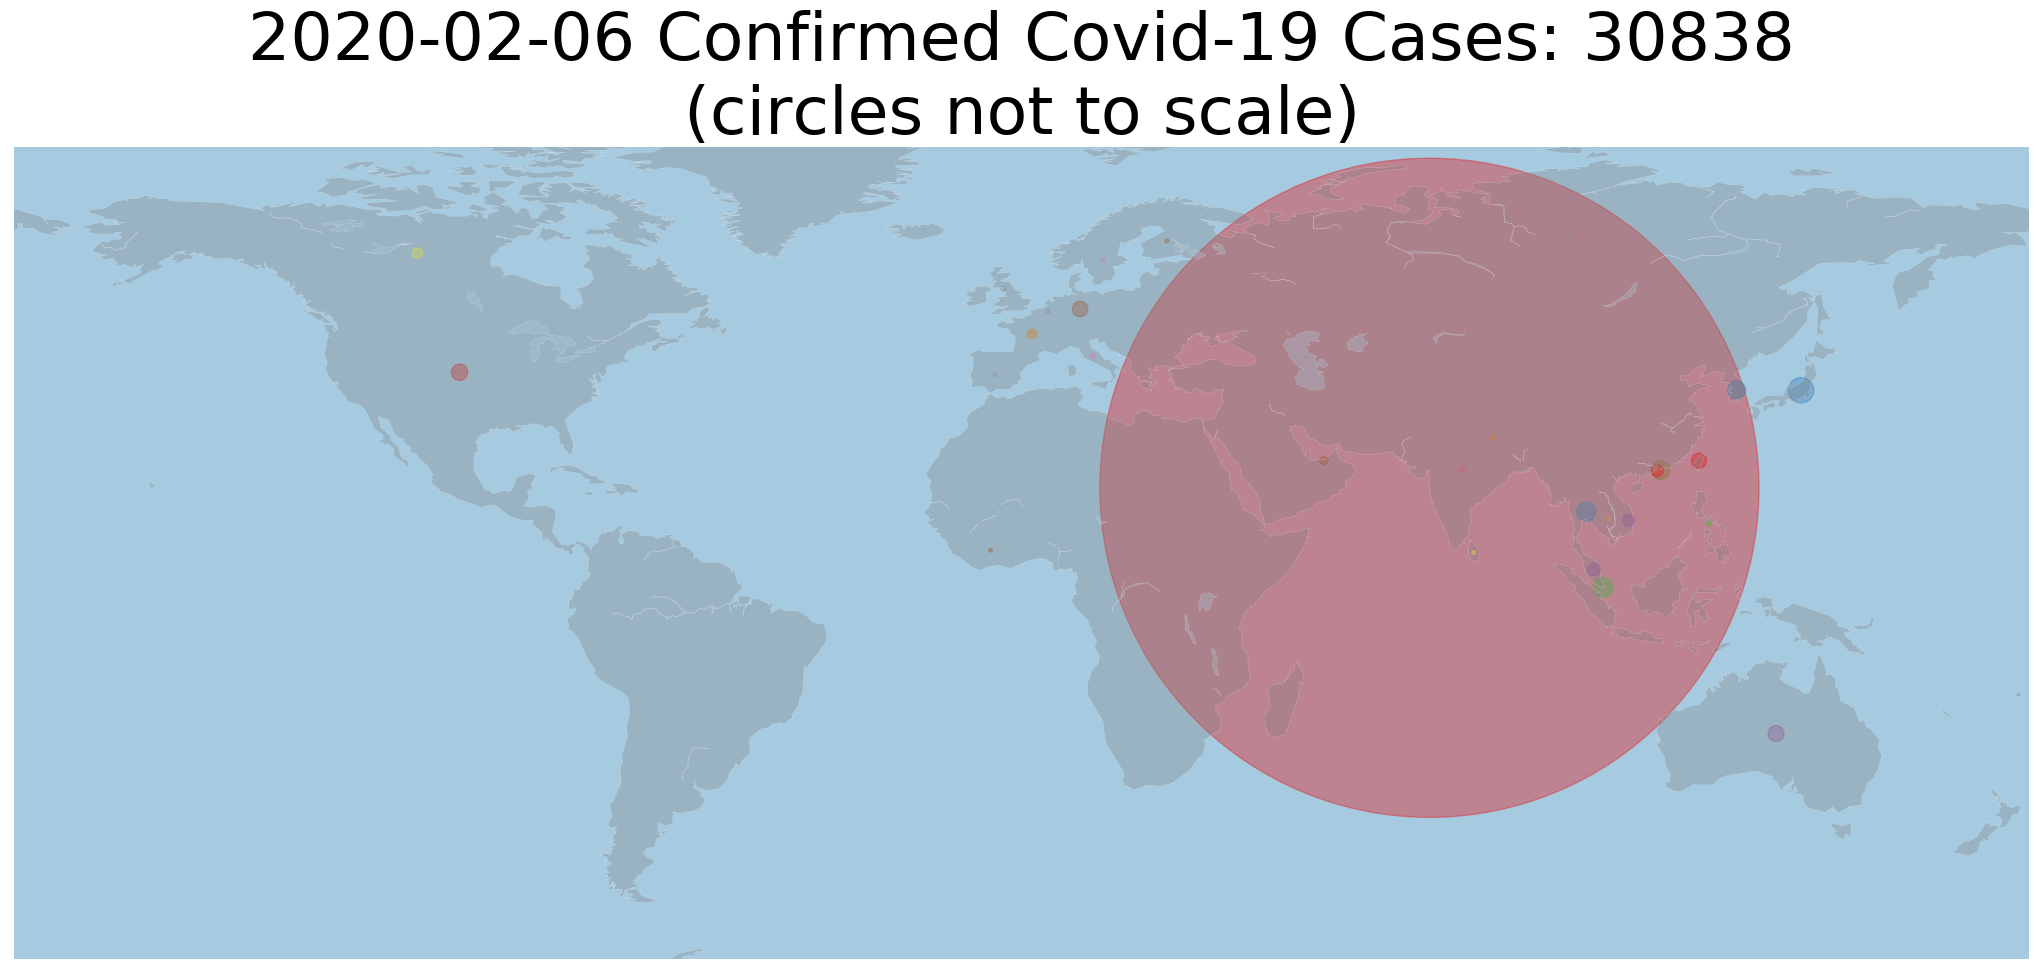

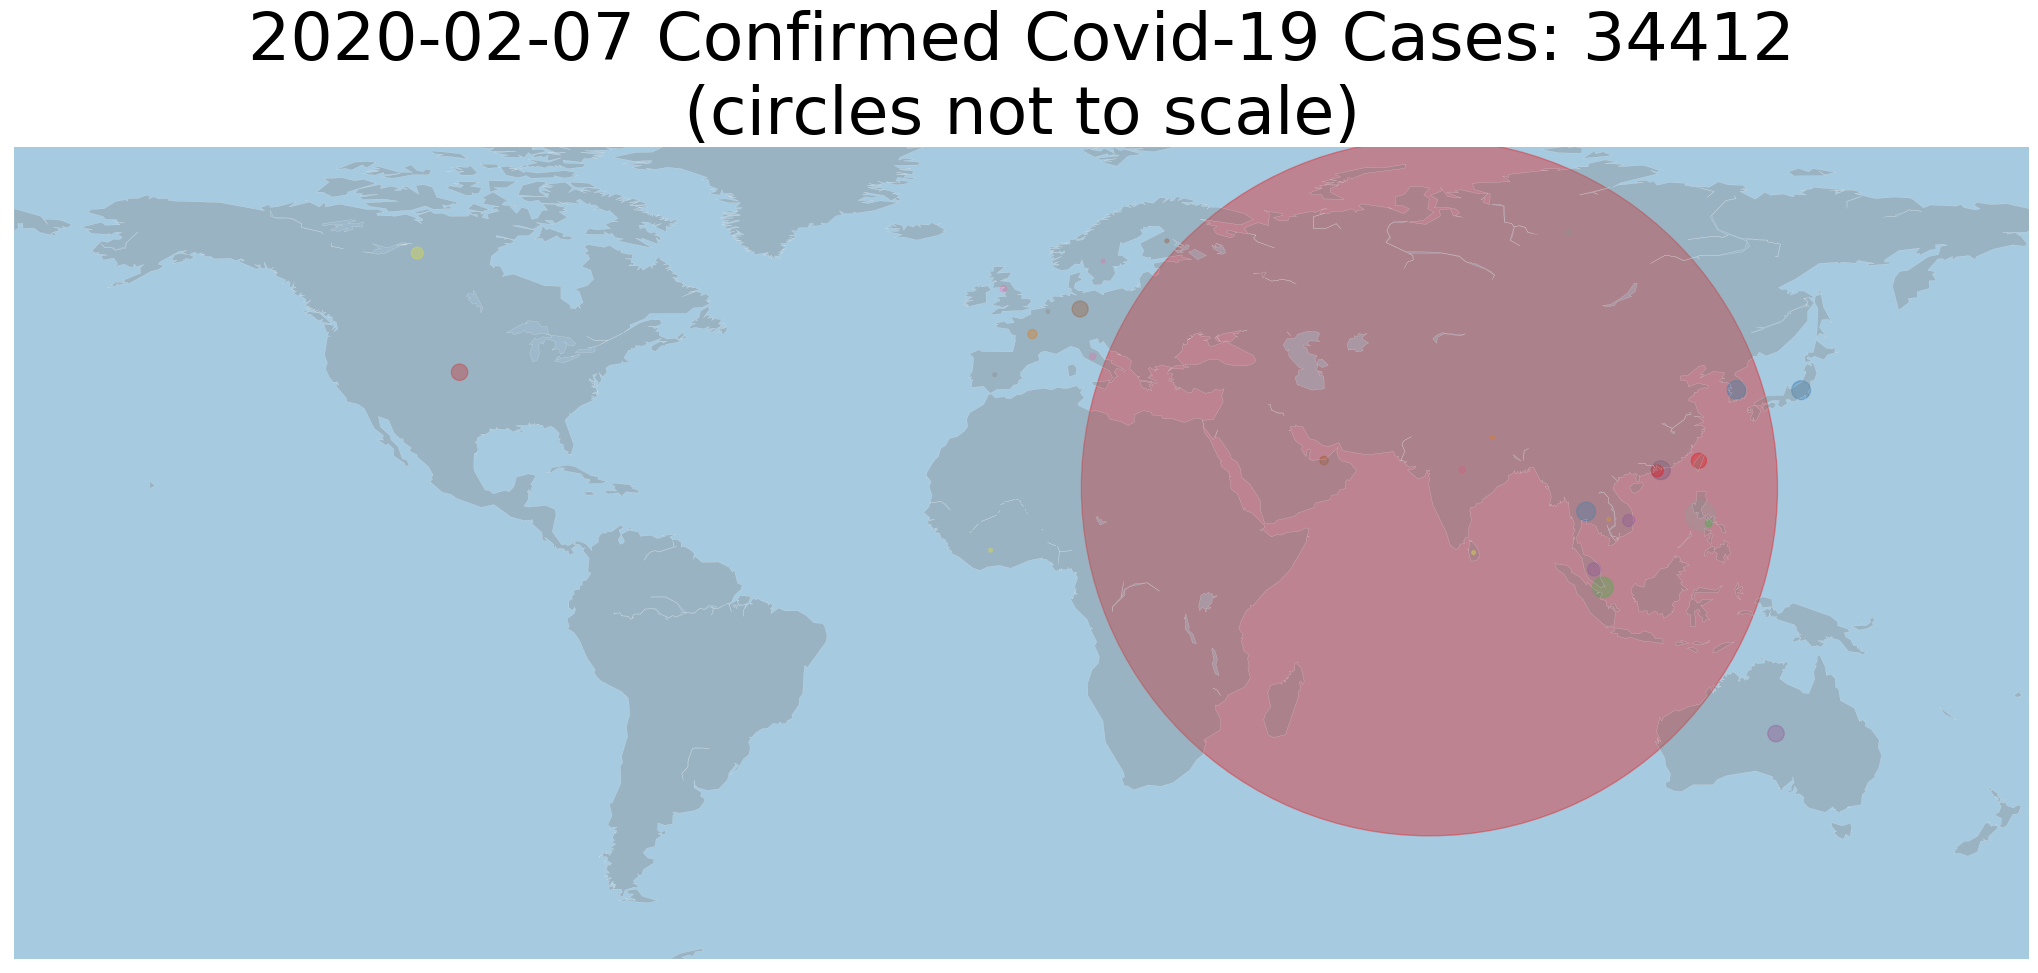

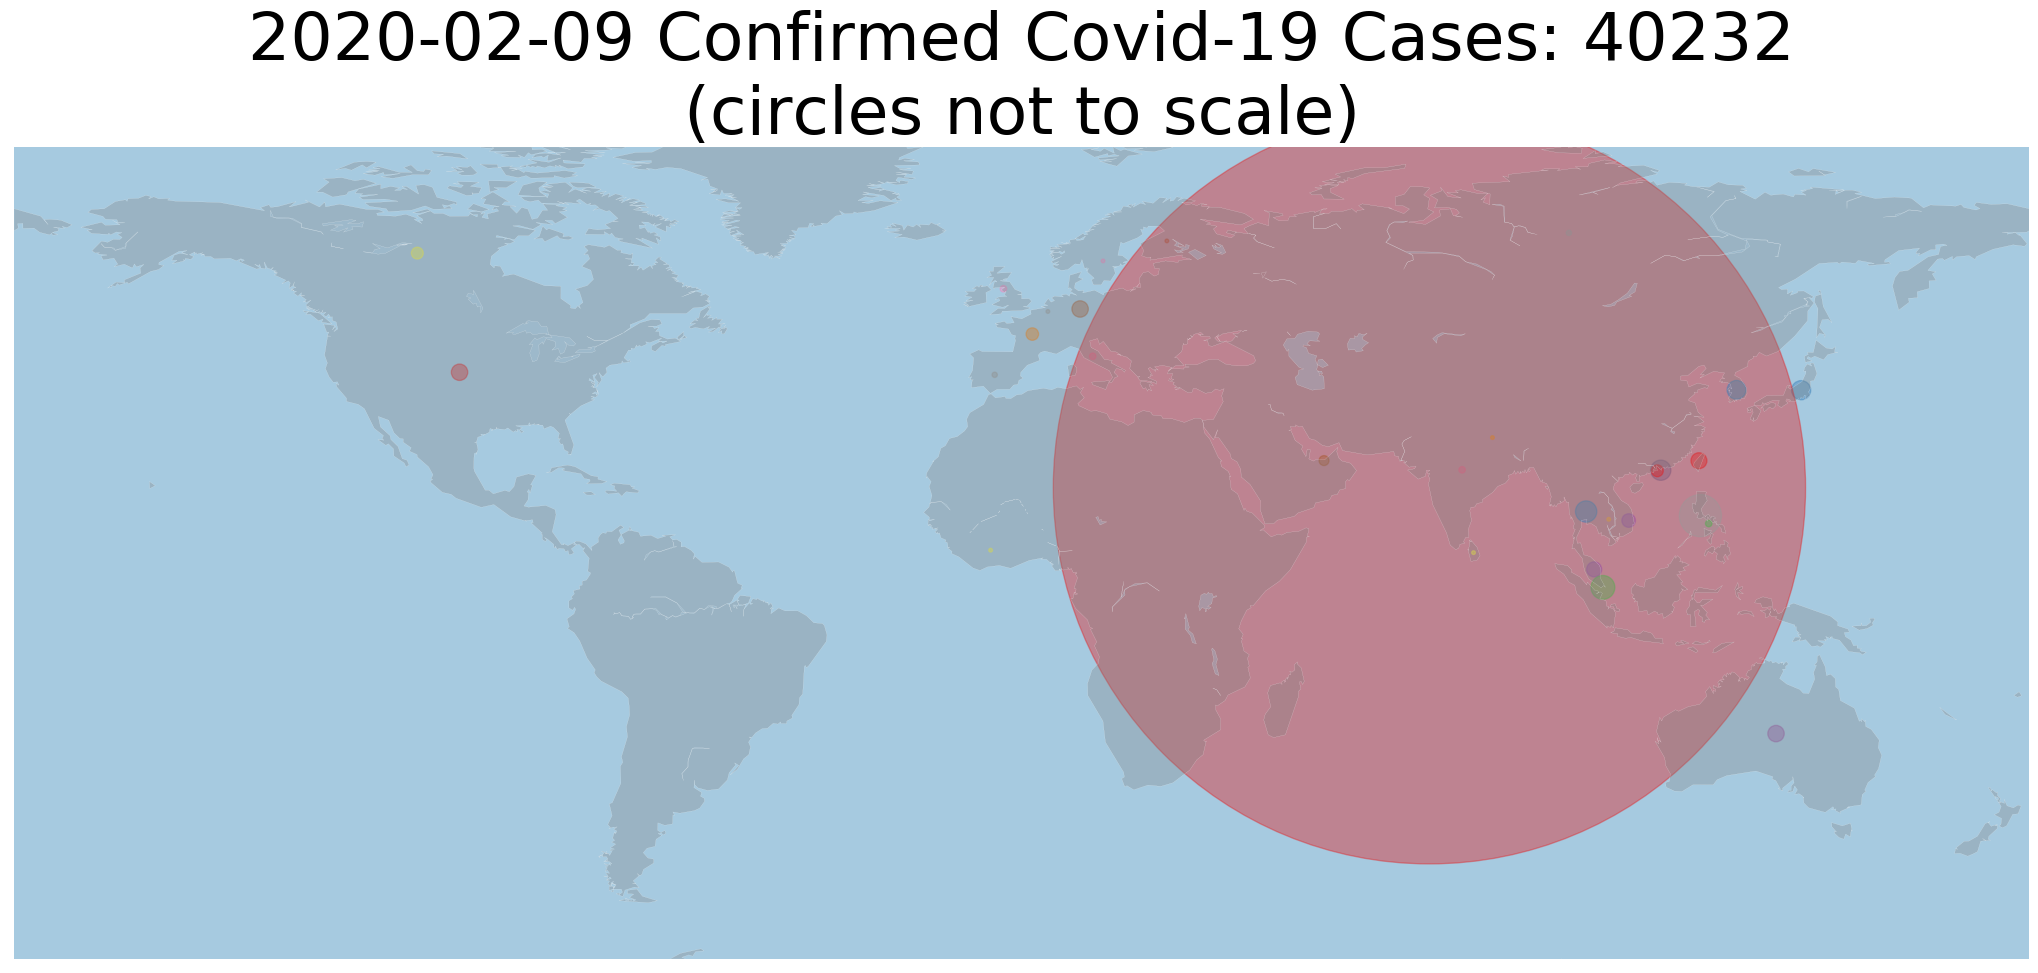

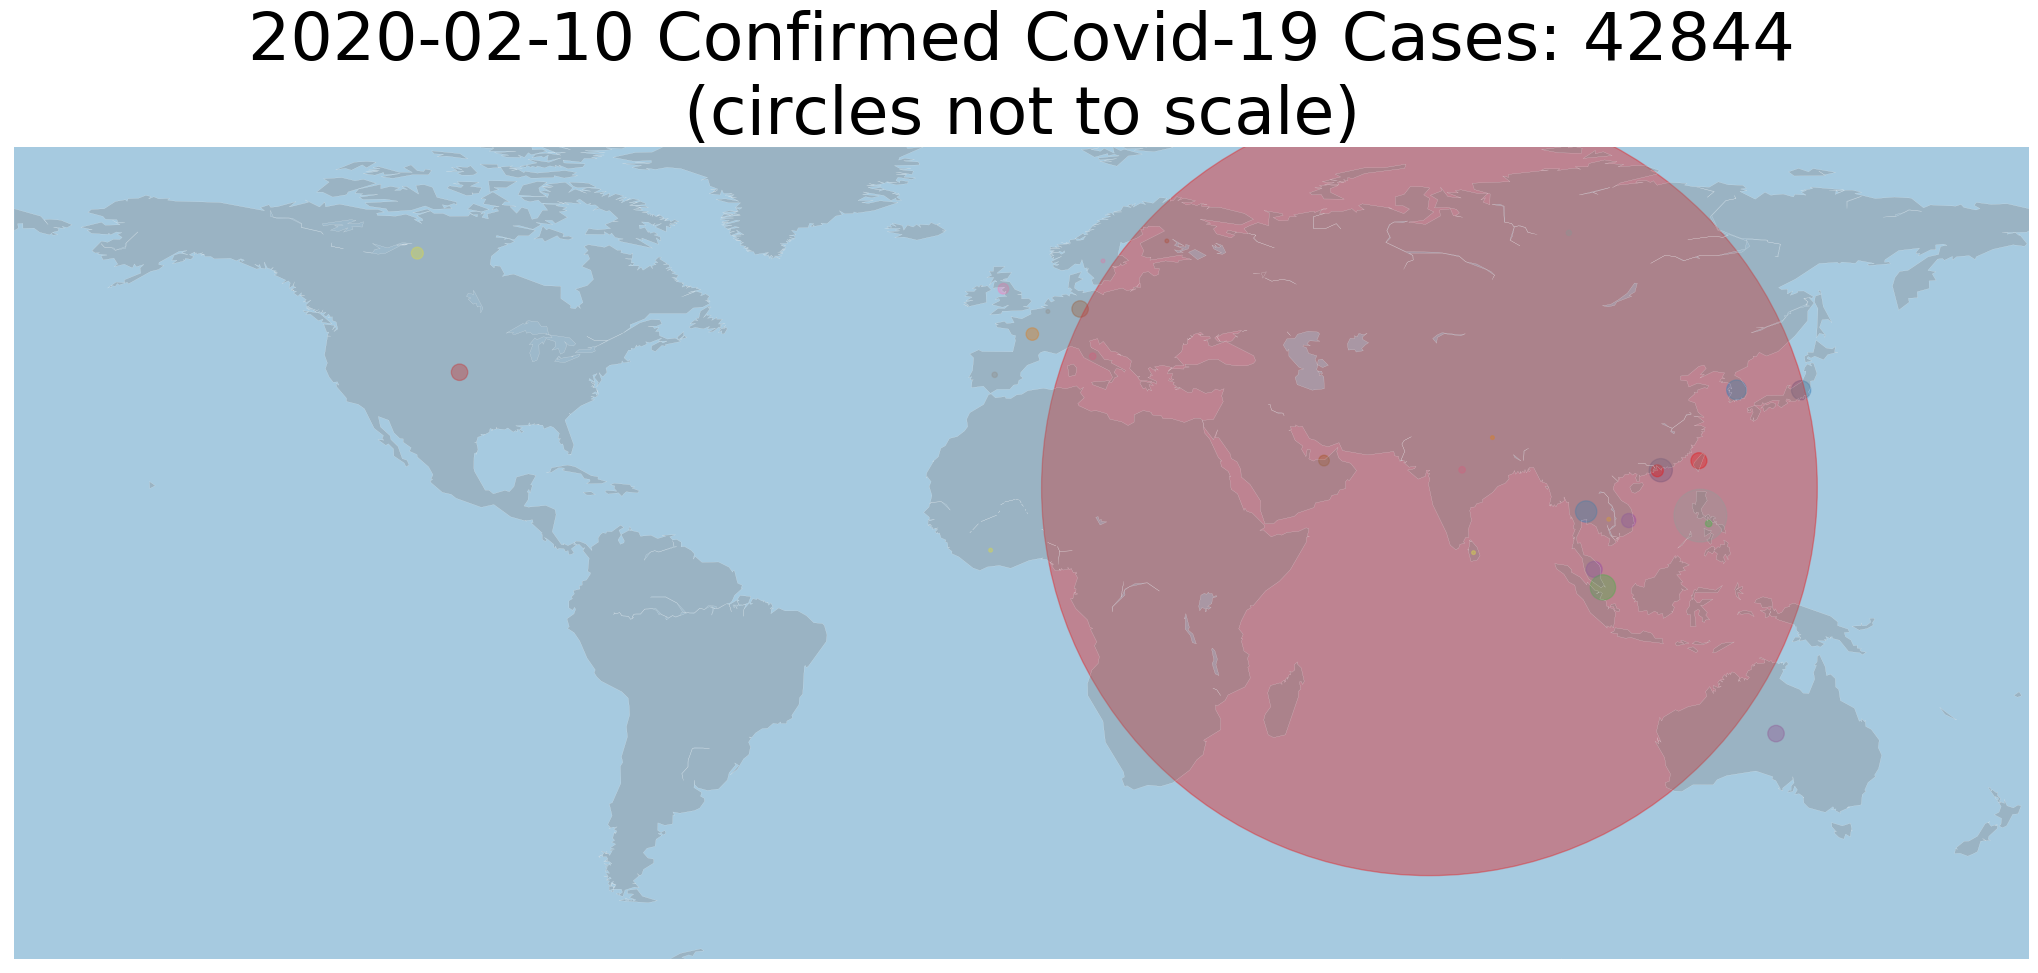

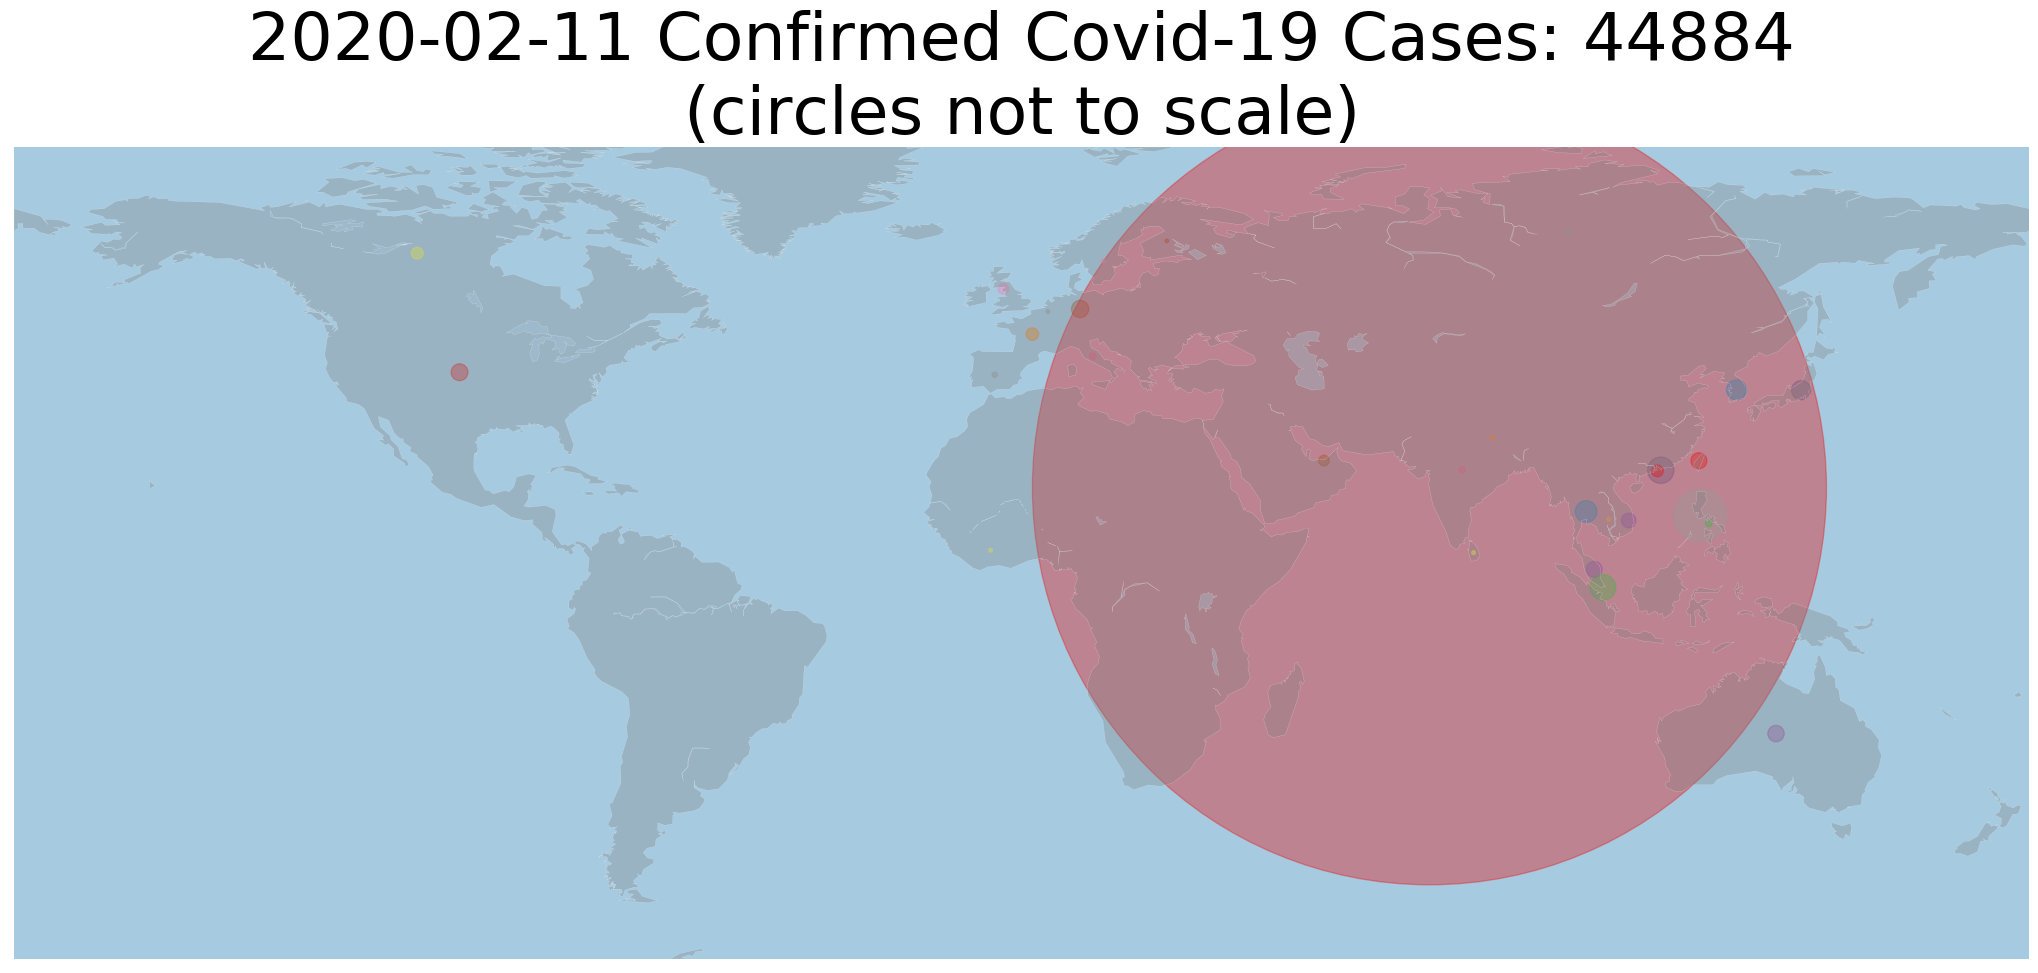

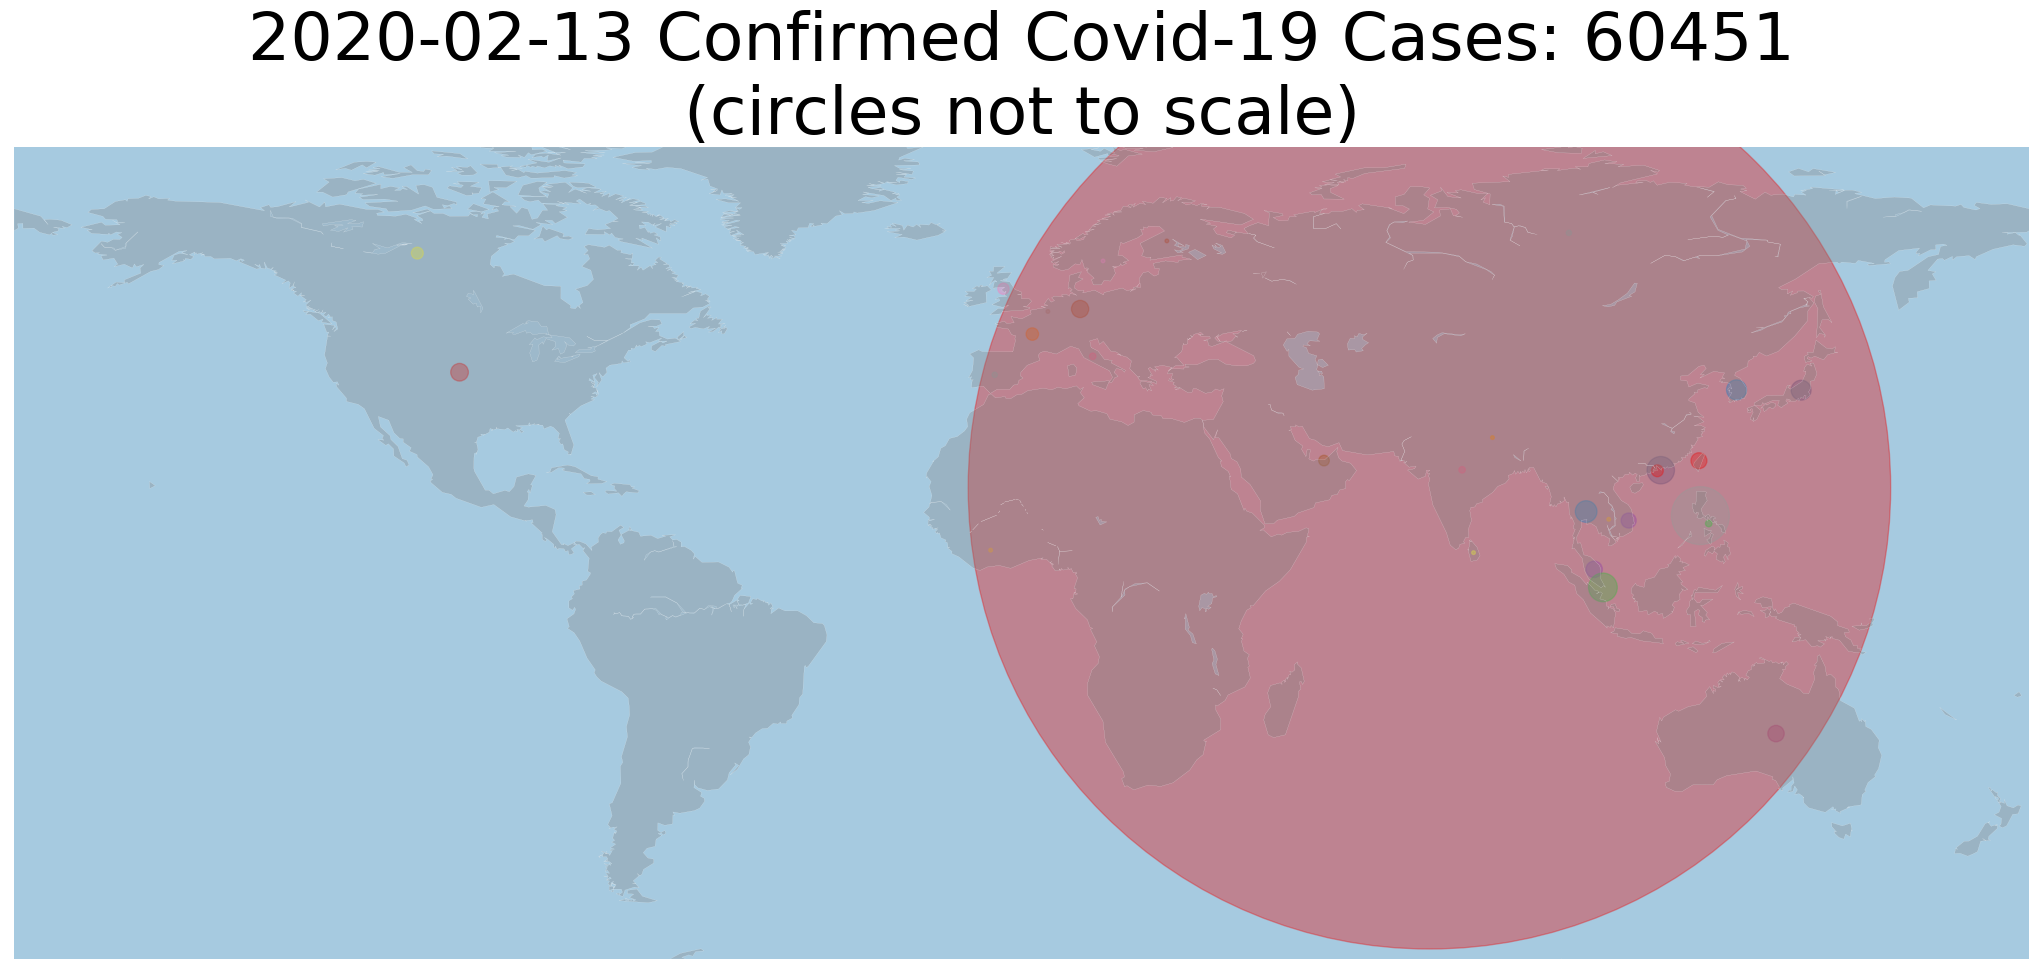

KeyboardInterrupt: 

<Figure size 2600x1800 with 0 Axes>

In [27]:
image_file_name_counter = 0
for date in dates:
    virus_up_to_today = covid_19_data[covid_19_data['ObservationDate'] <= date]
    
    # simplify data set
    virus_up_to_today = virus_up_to_today[['Country/Region','Province/State', 'labels_enc', 'Confirmed',
                         'Deaths', 'Recovered',
                         'Longitude', 'Latitude']]


    # get totals by province then by country as these are cumulative values by province first then by country and not all countries have provinces

    # group by country and sum/mean values
    virus_up_to_today=virus_up_to_today.groupby(['Country/Region', 'Province/State', 'labels_enc']).agg({'Confirmed':'last', 
                               'Deaths':'last',
                               'Recovered':'last',
                               'Longitude':'mean',
                              'Latitude':'mean'}).reset_index()



    # group by country and sum/mean values
    virus_up_to_today=virus_up_to_today.groupby(['Country/Region', 'labels_enc']).agg({'Confirmed':'sum', 
                               'Deaths':'sum',
                               'Recovered':'sum',
                               'Longitude':'mean',
                              'Latitude':'mean'}).reset_index()
     
    # map out confirmed cases
    file_to_save_name = 'pic_' + str(image_file_name_counter) + '.png'
    plot_world_map(virus_up_to_today, str(date)[0:10], file_to_save_name)
    
  
    image_file_name_counter += 1